In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
e = 1.602176634e-19                   # Elementary charge (C)
m_e = 9.10938356e-31                  # Electron mass (kg)
hbar = 1.054571817e-34                # Reduced Planck's constant (J·s)
c = 3e8                               # Speed of light
gamma_1 = 0.39 * e                    # Interlayer coupling energy (J)
gamma_0 = 3 * e                       # Intralayer coupling energy between A and B sites


B_const = 18                          # Constant Magnetic field (T)
E_const = 35 * 1e6                    # Constant Electric Field (mV/nm) 


d = 3.35e-10
g = 2
a = 2.46e-10
v = (np.sqrt(3) * a * gamma_0) / (2 * hbar)     ## from T Chakraborty book
m_eff = gamma_1 / (2 * v**2)                    ## from T Chakraborty book
mu_B = (e * hbar) / (2 * m_eff)
l_B = np.sqrt((hbar * c) / (e * B_const))

epsilon_0 = 8.854187817e-12
epsilon_parallel = 6.6
epsilon_perpendicular = 3

In [3]:
import scipy.integrate as integrate
import scipy.special as sp

def V_SC(q, epsilon_parallel, B, d):
    """Effective Coulomb interaction in BLG."""
    return (56.2/ epsilon_parallel) * (np.sqrt(B)) * (2 * np.pi / q) * np.tanh(q * d)  ## gives value in meV

def hankel_transform(V_SC, r):
    """Computes the 2D Fourier (Hankel) transform of V_SC(q)."""
    integrand = lambda q: q * V_SC(q, epsilon_parallel, B_const, d) * sp.j0(q * r)
    result, _ = integrate.quad(integrand, 0, np.inf, limit=100)
    return result * 1e-3 * e

In [4]:
# Compute V(r) at r = 0 and r = a/3
r_A2 = 0
r_B2 = a / np.sqrt(3)

V_A2 = hankel_transform(V_SC, r_A2) 
V_B2 = hankel_transform(V_SC, r_B2) 

C:\Users\gupt1\AppData\Local\Temp\ipykernel_2888\1733921007.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = integrate.quad(integrand, 0, np.inf, limit=100)


In [5]:
print("V_A2 : ", V_A2)  ## in Joule
print("V_B2 : ", V_B2)  ## in Joule

V_A2 :  6.091632508255745e-30
V_B2 :  6.0916319879639744e-30


# Case 1 : E = 0, $ B \neq 0 $ and Zeeman splitting is not considered

In [6]:
# Function to construct the Hamiltonian matrix
def hamiltonian_matrix_K(n):
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    delta_A2 = V_A2
    delta_B2 = V_B2
    omega_B = e * B_const / m_eff
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_K = np.array([
        [0, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_plus_1, 0, gamma_1, 0],
        [0, gamma_1, delta_A2, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n_plus_2, delta_B2]
    ])
    return H_K

In [7]:
def hamiltonian_matrix_K_prime(n):
    sqrt_n_plus_3 = np.sqrt(n + 3)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n = np.sqrt(n)
    delta_A2 = V_A2
    delta_B2 = V_B2
    omega_B = e * B_const / m_eff
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    
    H_K_prime = np.array([
        [0, hbar_omega_B_n_plus_2, 0, 0],
        [hbar_omega_B_n, 0, gamma_1, 0],
        [0, gamma_1, delta_A2, hbar_omega_B_n_plus_3],
        [0, 0, hbar_omega_B_n_plus_1, delta_B2]
    ])
    return H_K_prime

In [8]:
n_values = np.array([0,1])
E_K_0 = []
E_K_1 = []
E_K_2 = []
E_K_3 = []
for n in n_values:
    H_K = hamiltonian_matrix_K(n)
    eigvals_K = np.linalg.eigvalsh(H_K) / e  # Convert to eV
    E_K_0.append(eigvals_K[0])
    E_K_1.append(eigvals_K[1])
    E_K_2.append(eigvals_K[2])
    E_K_3.append(eigvals_K[3])    

E_K_0 = np.array(E_K_0)
E_K_1 = np.array(E_K_1)
E_K_2 = np.array(E_K_2)
E_K_3 = np.array(E_K_3)

In [9]:
E_K_prime_0 = []
E_K_prime_1 = []
E_K_prime_2 = []
E_K_prime_3 = []

for n in n_values:
    H_K_prime = hamiltonian_matrix_K_prime(n)
    eigvals_K_prime = np.linalg.eigvalsh(H_K_prime) / e  # Convert to eV
    E_K_prime_0.append(eigvals_K_prime[0])
    E_K_prime_1.append(eigvals_K_prime[1])
    E_K_prime_2.append(eigvals_K_prime[2])
    E_K_prime_3.append(eigvals_K_prime[3]) 

E_K_prime_0 = np.array(E_K_prime_0)
E_K_prime_1 = np.array(E_K_prime_1)
E_K_prime_2 = np.array(E_K_prime_2)
E_K_prime_3 = np.array(E_K_prime_3)

In [10]:
print("E_K_0 : ", E_K_0)
print("E_K_1 : ", E_K_1)
print("E_K_2 : ", E_K_2)
print("E_K_3 : ", E_K_3)

print('')
      
print("E_K_prime_0 : ", E_K_prime_0)
print("E_K_prime_1 : ", E_K_prime_1)
print("E_K_prime_2 : ", E_K_prime_2)
print("E_K_prime_3 : ", E_K_prime_3)

E_K_0 :  [-0.40225843 -0.41002917]
E_K_1 :  [-0.01153724 -0.01960438]
E_K_2 :  [0.01153724 0.01960438]
E_K_3 :  [0.40225843 0.41002917]

E_K_prime_0 :  [-0.39418479 -0.40225843]
E_K_prime_1 :  [ 0.         -0.01153724]
E_K_prime_2 :  [3.72179001e-11 1.15372440e-02]
E_K_prime_3 :  [0.39418479 0.40225843]


### Now plotting Energy eigenvalues against Magnetic field keeping E fixed at 35 mV/nm

In [11]:
# Magnetic field values
B_values = np.linspace(0, 30, 100)  # 100 values between 0 and 30T
n_values = list(range(3))  # n = 0 and n = 1  

# Store eigenvalues for all n
all_eigenvalues_K_var_B = np.zeros((len(n_values), len(B_values), 4))
all_eigenvalues_K_prime_var_B = np.zeros((len(n_values), len(B_values), 4))

In [12]:
def hamiltonian_matrix_K_var_B(n, omega_B):
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    delta_A2 = V_A2
    delta_B2 = V_B2
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_K_var_B = np.array([
        [0, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_plus_1, 0, gamma_1, 0],
        [0, gamma_1, delta_A2, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n_plus_2, delta_B2]
    ])
    return H_K_var_B

In [13]:
def hamiltonian_matrix_K_prime_var_B(n, omega_B):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_3 = np.sqrt(n + 3)
    delta_A2 = V_A2
    delta_B2 = V_B2
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    
    H_K_prime_var_B = np.array([
        [0, hbar_omega_B_n_plus_2, 0, 0],
        [hbar_omega_B_n, 0, gamma_1, 0],
        [0, gamma_1, delta_A2, hbar_omega_B_n_plus_3],
        [0, 0, hbar_omega_B_n_plus_1, delta_B2]
    ])
    return H_K_prime_var_B

In [14]:
# Compute eigenvalues
for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        omega_B = e * B / m_eff
        H_K_var_B = hamiltonian_matrix_K_var_B(n, omega_B)
        H_K_prime_var_B = hamiltonian_matrix_K_prime_var_B(n, omega_B)
        eigvals_K_var_B = np.linalg.eigvalsh(H_K_var_B) / e  # Convert to eV
        eigvals_K_prime_var_B = np.linalg.eigvalsh(H_K_prime_var_B) / e  # Convert to eV
        all_eigenvalues_K_var_B[i, j, :] = eigvals_K_var_B
        all_eigenvalues_K_prime_var_B[i, j, :] = eigvals_K_prime_var_B

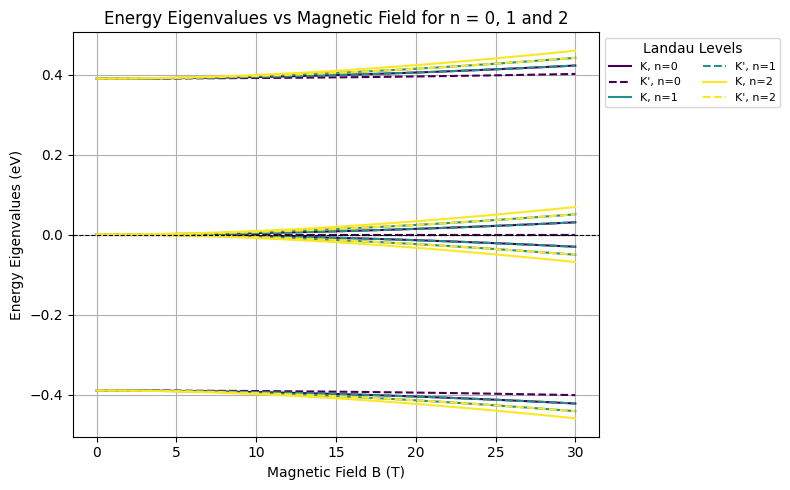

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(B_values, all_eigenvalues_K_var_B[i, :, mode], color=colors[i], linestyle='-', label=f'K, n={n}' if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_K_prime_var_B[i, :, mode], color=colors[i], linestyle='--', label=f"K', n={n}" if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Magnetic Field for n = 0, 1 and 2')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()

plt.tight_layout()

# Save the figure
# plt.savefig("energy_vs_B.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

# Case 2 : Now considering Zeeman Splitting and E = 0

In [16]:
### Considering Zeeman splitting

def hamiltonian_matrix_ZS_K(n):
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    delta_A2 = V_A2
    delta_B2 = V_B2
    omega_B = e * B_const / m_eff
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    delta_ZS = g * mu_B * B_const
    
    H_ZS_K = np.array([
        [delta_ZS, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_plus_1, delta_ZS, gamma_1, 0],
        [0, gamma_1, delta_A2 + delta_ZS, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n_plus_2, delta_B2 + delta_ZS]
    ])
    return H_ZS_K

In [17]:
def hamiltonian_matrix_ZS_K_prime(n):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_3 = np.sqrt(n + 3)
    delta_A2 = V_A2
    delta_B2 = V_B2
    omega_B = e * B_const / m_eff
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    delta_ZS = g * mu_B * B_const
    
    H_ZS_K_prime = np.array([
        [delta_ZS, hbar_omega_B_n_plus_2, 0, 0],
        [hbar_omega_B_n, delta_ZS, gamma_1, 0],
        [0, gamma_1, delta_ZS + delta_A2, hbar_omega_B_n_plus_3],
        [0, 0, hbar_omega_B_n_plus_1, delta_B2 + delta_ZS]
    ])
    return H_ZS_K_prime

In [18]:
n_values = np.array([0,1])
E_ZS_K_0 = []
E_ZS_K_1 = []
E_ZS_K_2 = []
E_ZS_K_3 = []
for n in n_values:
    H_ZS_K = hamiltonian_matrix_ZS_K(n)
    eigvals_ZS_K = np.linalg.eigvalsh(H_ZS_K) / e  # Convert to eV
    E_ZS_K_0.append(eigvals_ZS_K[0])
    E_ZS_K_1.append(eigvals_ZS_K[1])
    E_ZS_K_2.append(eigvals_ZS_K[2])
    E_ZS_K_3.append(eigvals_ZS_K[3])

E_ZS_K_0 = np.array(E_ZS_K_0)
E_ZS_K_1 = np.array(E_ZS_K_1)
E_ZS_K_2 = np.array(E_ZS_K_2)
E_ZS_K_3 = np.array(E_ZS_K_3)

In [19]:
E_ZS_K_prime_0 = []
E_ZS_K_prime_1 = []
E_ZS_K_prime_2 = []
E_ZS_K_prime_3 = []

for n in n_values:
    H_ZS_K_prime = hamiltonian_matrix_ZS_K_prime(n)
    eigvals_ZS_K_prime = np.linalg.eigvalsh(H_ZS_K_prime) / e  # Convert to eV
    E_ZS_K_prime_0.append(eigvals_ZS_K_prime[0])
    E_ZS_K_prime_1.append(eigvals_ZS_K_prime[1])
    E_ZS_K_prime_2.append(eigvals_ZS_K_prime[2])
    E_ZS_K_prime_3.append(eigvals_ZS_K_prime[3])

E_ZS_K_prime_0 = np.array(E_ZS_K_prime_0)
E_ZS_K_prime_1 = np.array(E_ZS_K_prime_1)
E_ZS_K_prime_2 = np.array(E_ZS_K_prime_2)
E_ZS_K_prime_3 = np.array(E_ZS_K_prime_3)

In [20]:
print("E_ZS_K_0 : ", E_ZS_K_0)
print("E_ZS_K_1 : ", E_ZS_K_1)
print("E_ZS_K_2 : ", E_ZS_K_2)
print("E_ZS_K_3 : ", E_ZS_K_3)

print('')

print("E_ZS_K_prime_0 : ", E_ZS_K_prime_0)
print("E_ZS_K_prime_1 : ", E_ZS_K_prime_1)
print("E_ZS_K_prime_2 : ", E_ZS_K_prime_2)
print("E_ZS_K_prime_3 : ", E_ZS_K_prime_3)

E_ZS_K_0 :  [-0.34497274 -0.35274348]
E_ZS_K_1 :  [0.04574844 0.03768131]
E_ZS_K_2 :  [0.06882293 0.07689007]
E_ZS_K_3 :  [0.45954411 0.46731485]

E_ZS_K_prime_0 :  [-0.33689911 -0.34497274]
E_ZS_K_prime_1 :  [0.05728569 0.04574844]
E_ZS_K_prime_2 :  [0.05728569 0.06882293]
E_ZS_K_prime_3 :  [0.45147048 0.45954411]


### Now plotting Energy eigenvalues against Magnetic field keeping E fixed at 35 mV/nm

In [21]:
# Magnetic field values
B_values = np.linspace(0, 30, 100)  # 100 values between 0 and 30T
n_values = list(range(3))  # n = 0 and n = 1  

# Store eigenvalues for all n
all_eigenvalues_ZS_K_var_B = np.zeros((len(n_values), len(B_values), 4))
all_eigenvalues_ZS_K_prime_var_B = np.zeros((len(n_values), len(B_values), 4))

In [22]:
def hamiltonian_matrix_ZS_K_var_B(n, omega_B, delta_ZS):
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    delta_A2 = V_A2
    delta_B2 = V_B2
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_ZS_K_var_B = np.array([
        [delta_ZS, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_plus_1, delta_ZS, gamma_1, 0],
        [0, gamma_1, delta_A2 + delta_ZS, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n_plus_2, delta_B2 + delta_ZS]
    ])
    return H_ZS_K_var_B

In [23]:
def hamiltonian_matrix_ZS_K_prime_var_B(n, omega_B, delta_ZS):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_3 = np.sqrt(n + 3)
    delta_A2 = V_A2
    delta_B2 = V_B2
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    
    H_ZS_K_prime_var_B = np.array([
        [delta_ZS, hbar_omega_B_n_plus_2, 0, 0],
        [hbar_omega_B_n, delta_ZS, gamma_1, 0],
        [0, gamma_1, delta_ZS + delta_A2, hbar_omega_B_n_plus_3],
        [0, 0, hbar_omega_B_n_plus_1, delta_B2 + delta_ZS]
    ])
    return H_ZS_K_prime_var_B

In [24]:
# Compute eigenvalues
for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        omega_B = e * B / m_eff
        delta_ZS = g * mu_B * B
        H_ZS_K_var_B = hamiltonian_matrix_ZS_K_var_B(n, omega_B, delta_ZS)
        H_ZS_K_prime_var_B = hamiltonian_matrix_ZS_K_prime_var_B(n, omega_B, delta_ZS)
        eigvals_ZS_K_var_B = np.linalg.eigvalsh(H_ZS_K_var_B) / e  # Convert to eV
        eigvals_ZS_K_prime_var_B = np.linalg.eigvalsh(H_ZS_K_prime_var_B) / e  # Convert to eV
        all_eigenvalues_ZS_K_var_B[i, j, :] = eigvals_ZS_K_var_B
        all_eigenvalues_ZS_K_prime_var_B[i, j, :] = eigvals_ZS_K_prime_var_B

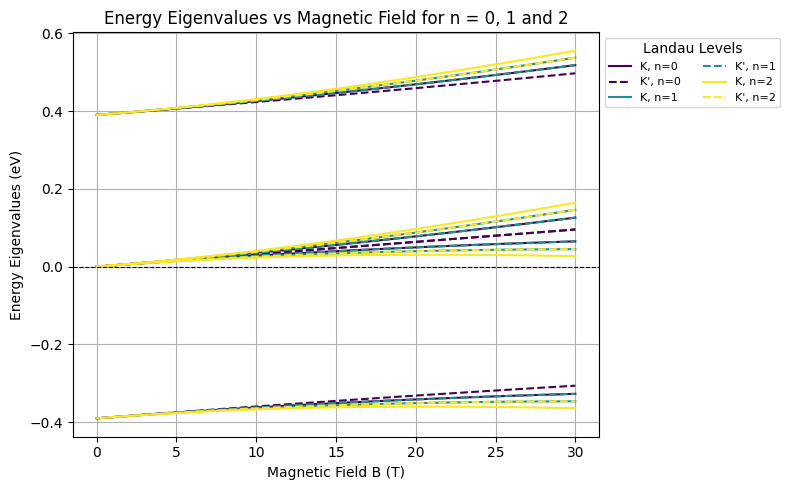

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(B_values, all_eigenvalues_ZS_K_var_B[i, :, mode], color=colors[i], linestyle='-', label=f'K, n={n}' if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_ZS_K_prime_var_B[i, :, mode], color=colors[i], linestyle='--', label=f"K', n={n}" if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Magnetic Field for n = 0, 1 and 2')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()

plt.tight_layout()

# Save the figure
# plt.savefig("energy_vs_B.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

# Case 3 : Now electric field $ E \neq 0 $ and Zeeman Splitting is considered

In [26]:
def hamiltonian_matrix_ZS_EF_K(n):
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    potential_diff = e * E_const * (d / 2)
    delta_A2 = V_A2
    delta_B2 = V_B2
    omega_B = e * B_const / m_eff
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    delta_ZS = g * mu_B * B_const
    
    H_ZS_EF_K = np.array([
        [delta_ZS + potential_diff, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_plus_1, delta_ZS + potential_diff, gamma_1, 0],
        [0, gamma_1, delta_A2 + delta_ZS - potential_diff, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n_plus_2, delta_B2 + delta_ZS - potential_diff]
    ])
    return H_ZS_EF_K

In [27]:
def hamiltonian_matrix_ZS_EF_K_prime(n):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_3 = np.sqrt(n + 3)
    potential_diff = e * E_const * (d / 2)
    delta_A2 = V_A2
    delta_B2 = V_B2
    omega_B = e * B_const / m_eff
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    delta_ZS = g * mu_B * B_const
    
    H_ZS_EF_K_prime = np.array([
        [delta_ZS + potential_diff, hbar_omega_B_n_plus_2, 0, 0],
        [hbar_omega_B_n, delta_ZS + potential_diff, gamma_1, 0],
        [0, gamma_1, delta_ZS + delta_A2 - potential_diff, hbar_omega_B_n_plus_3],
        [0, 0, hbar_omega_B_n_plus_1, delta_B2 + delta_ZS - potential_diff]
    ])
    return H_ZS_EF_K_prime

In [28]:
n_values = np.array([0,1])
E_ZS_EF_K_0 = []
E_ZS_EF_K_1 = []
E_ZS_EF_K_2 = []
E_ZS_EF_K_3 = []
for n in n_values:
    H_ZS_EF_K = hamiltonian_matrix_ZS_EF_K(n)
    eigvals_ZS_EF_K = np.linalg.eigvalsh(H_ZS_EF_K) / e  # Convert to eV
    E_ZS_EF_K_0.append(eigvals_ZS_EF_K[0])
    E_ZS_EF_K_1.append(eigvals_ZS_EF_K[1])
    E_ZS_EF_K_2.append(eigvals_ZS_EF_K[2])
    E_ZS_EF_K_3.append(eigvals_ZS_EF_K[3])

E_ZS_EF_K_0 = np.array(E_ZS_EF_K_0)
E_ZS_EF_K_1 = np.array(E_ZS_EF_K_1)
E_ZS_EF_K_2 = np.array(E_ZS_EF_K_2)
E_ZS_EF_K_3 = np.array(E_ZS_EF_K_3)

In [29]:
n_values = np.array([0,1])
E_ZS_EF_K_prime_0 = []
E_ZS_EF_K_prime_1 = []
E_ZS_EF_K_prime_2 = []
E_ZS_EF_K_prime_3 = []

for n in n_values:
    H_ZS_EF_K_prime = hamiltonian_matrix_ZS_EF_K_prime(n)
    eigvals_ZS_EF_K_prime = np.linalg.eigvalsh(H_ZS_EF_K_prime) / e  # Convert to eV
    E_ZS_EF_K_prime_0.append(eigvals_ZS_EF_K_prime[0])
    E_ZS_EF_K_prime_1.append(eigvals_ZS_EF_K_prime[1])
    E_ZS_EF_K_prime_2.append(eigvals_ZS_EF_K_prime[2])
    E_ZS_EF_K_prime_3.append(eigvals_ZS_EF_K_prime[3])

E_ZS_EF_K_prime_0 = np.array(E_ZS_EF_K_prime_0)
E_ZS_EF_K_prime_1 = np.array(E_ZS_EF_K_prime_1)
E_ZS_EF_K_prime_2 = np.array(E_ZS_EF_K_prime_2)
E_ZS_EF_K_prime_3 = np.array(E_ZS_EF_K_prime_3)

In [30]:
print("E_ZS_EF_K_0 : ", E_ZS_EF_K_0)
print("E_ZS_EF_K_1 : ", E_ZS_EF_K_1)
print("E_ZS_EF_K_2 : ", E_ZS_EF_K_2)
print("E_ZS_EF_K_3 : ", E_ZS_EF_K_3)

print('')

print("E_ZS_EF_K_prime_0 : ", E_ZS_EF_K_prime_0)
print("E_ZS_EF_K_prime_1 : ", E_ZS_EF_K_prime_1)
print("E_ZS_EF_K_prime_2 : ", E_ZS_EF_K_prime_2)
print("E_ZS_EF_K_prime_3 : ", E_ZS_EF_K_prime_3)

E_ZS_EF_K_0 :  [-0.34513959 -0.35290822]
E_ZS_EF_K_1 :  [0.04462556 0.03710283]
E_ZS_EF_K_2 :  [0.07018378 0.07769791]
E_ZS_EF_K_3 :  [0.45947299 0.46725022]

E_ZS_EF_K_prime_0 :  [-0.33706829 -0.34513959]
E_ZS_EF_K_prime_1 :  [0.05167081 0.04462556]
E_ZS_EF_K_prime_2 :  [0.06314819 0.07018378]
E_ZS_EF_K_prime_3 :  [0.45139204 0.45947299]


### Now plotting Energy eigenvalues against Magnetic field keeping E fixed at 35 mV/nm

In [31]:
# Magnetic field values
B_values = np.linspace(0, 30, 100)  # 100 values between 0 and 30T
n_values = list(range(3))  # n = 0 and n = 1  

# Store eigenvalues for all n
all_eigenvalues_ZS_EF_K_var_B = np.zeros((len(n_values), len(B_values), 4))
all_eigenvalues_ZS_EF_K_prime_var_B = np.zeros((len(n_values), len(B_values), 4))

In [32]:
def hamiltonian_matrix_ZS_EF_K_var_B(n, omega_B, delta_ZS):
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    potential_diff = e * E_const * (d / 2)
    delta_A2 = V_A2
    delta_B2 = V_B2
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_ZS_EF_K_var_B = np.array([
        [delta_ZS + potential_diff, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_plus_1, delta_ZS + potential_diff, gamma_1, 0],
        [0, gamma_1, delta_A2 + delta_ZS - potential_diff, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n_plus_2, delta_B2 + delta_ZS - potential_diff]
    ])
    return H_ZS_EF_K_var_B

In [33]:
def hamiltonian_matrix_ZS_EF_K_prime_var_B(n, omega_B, delta_ZS):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_3 = np.sqrt(n + 3)
    potential_diff = e * E_const * (d / 2)
    delta_A2 = V_A2
    delta_B2 = V_B2
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    
    H_ZS_EF_K_prime_var_B = np.array([
        [delta_ZS + potential_diff, hbar_omega_B_n_plus_2, 0, 0],
        [hbar_omega_B_n, delta_ZS + potential_diff, gamma_1, 0],
        [0, gamma_1, delta_ZS + delta_A2 - potential_diff, hbar_omega_B_n_plus_3],
        [0, 0, hbar_omega_B_n_plus_1, delta_B2 + delta_ZS - potential_diff]
    ])
    return H_ZS_EF_K_prime_var_B

In [34]:
# Compute eigenvalues
for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        omega_B = e * B / m_eff
        delta_ZS = g * mu_B * B
        H_ZS_EF_K_var_B = hamiltonian_matrix_ZS_EF_K_var_B(n, omega_B, delta_ZS)
        H_ZS_EF_K_prime_var_B = hamiltonian_matrix_ZS_EF_K_prime_var_B(n, omega_B, delta_ZS)
        eigvals_ZS_EF_K_var_B = np.linalg.eigvalsh(H_ZS_EF_K_var_B) / e  # Convert to eV
        eigvals_ZS_EF_K_prime_var_B = np.linalg.eigvalsh(H_ZS_EF_K_prime_var_B) / e  # Convert to eV
        all_eigenvalues_ZS_EF_K_var_B[i, j, :] = eigvals_ZS_EF_K_var_B
        all_eigenvalues_ZS_EF_K_prime_var_B[i, j, :] = eigvals_ZS_EF_K_prime_var_B

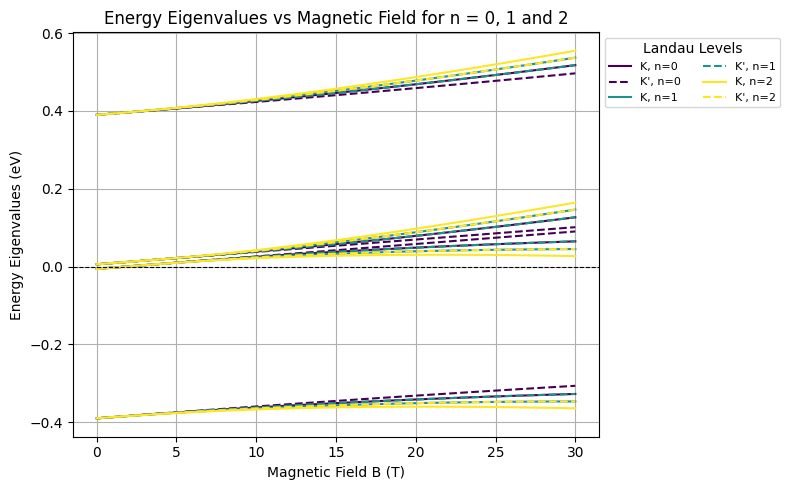

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_var_B[i, :, mode], color=colors[i], linestyle='-', label=f'K, n={n}' if mode == 0 else "")
        ax.plot(B_values, all_eigenvalues_ZS_EF_K_prime_var_B[i, :, mode], color=colors[i], linestyle='--', label=f"K', n={n}" if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Magnetic Field for n = 0, 1 and 2')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()

plt.tight_layout()

# Save the figure
# plt.savefig("energy_vs_B.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

### Now plotting Energy eigenvalues against Electric field keeping B fixed at 18T

In [36]:
# Electric field values
E_values = np.linspace(0, 50, 100)  
n_values = list(range(3))  # n = 0, 1 and 2  

# Store eigenvalues for all n
all_eigenvalues_ZS_EF_K_var_E = np.zeros((len(n_values), len(E_values), 4))
all_eigenvalues_ZS_EF_K_prime_var_E = np.zeros((len(n_values), len(E_values), 4))

In [37]:
def hamiltonian_matrix_ZS_EF_K_var_E(n, potential_diff):
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    omega_B = e * B_const / m_eff
    delta_A2 = V_A2
    delta_B2 = V_B2
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    delta_ZS = g * mu_B * B_const
    
    H_ZS_EF_K_var_E = np.array([
        [delta_ZS + potential_diff, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_plus_1, delta_ZS + potential_diff, gamma_1, 0],
        [0, gamma_1, delta_A2 + delta_ZS - potential_diff, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n_plus_2, delta_B2 + delta_ZS - potential_diff]
    ])
    return H_ZS_EF_K_var_E

In [38]:
def hamiltonian_matrix_ZS_EF_K_prime_var_E(n, potential_diff):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    sqrt_n_plus_3 = np.sqrt(n + 3)
    delta_A2 = V_A2
    delta_B2 = V_B2
    omega_B = e * B_const / m_eff
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    hbar_omega_B_n_plus_3 = hbar * omega_B * sqrt_n_plus_3
    delta_ZS = g * mu_B * B_const
    
    H_ZS_EF_K_prime_var_E = np.array([
        [delta_ZS + potential_diff, hbar_omega_B_n_plus_2, 0, 0],
        [hbar_omega_B_n, delta_ZS + potential_diff, gamma_1, 0],
        [0, gamma_1, delta_ZS + delta_A2 - potential_diff, hbar_omega_B_n_plus_3],
        [0, 0, hbar_omega_B_n_plus_1, delta_B2 + delta_ZS - potential_diff]
    ])
    return H_ZS_EF_K_prime_var_E

In [39]:
# Compute eigenvalues
for i, n in enumerate(n_values):
    for j, E in enumerate(E_values):
        potential_diff = e * E * (d/2)
        H_ZS_EF_K_var_E = hamiltonian_matrix_ZS_EF_K_var_E(n, potential_diff)
        H_ZS_EF_K_prime_var_E = hamiltonian_matrix_ZS_EF_K_prime_var_E(n, potential_diff)
        eigvals_ZS_EF_K_var_E = np.linalg.eigvalsh(H_ZS_EF_K_var_E) / e  # Convert to eV
        eigvals_ZS_EF_K_prime_var_E = np.linalg.eigvalsh(H_ZS_EF_K_prime_var_E) / e  # Convert to eV
        all_eigenvalues_ZS_EF_K_var_E[i, j, :] = eigvals_ZS_EF_K_var_E
        all_eigenvalues_ZS_EF_K_prime_var_E[i, j, :] = eigvals_ZS_EF_K_prime_var_E

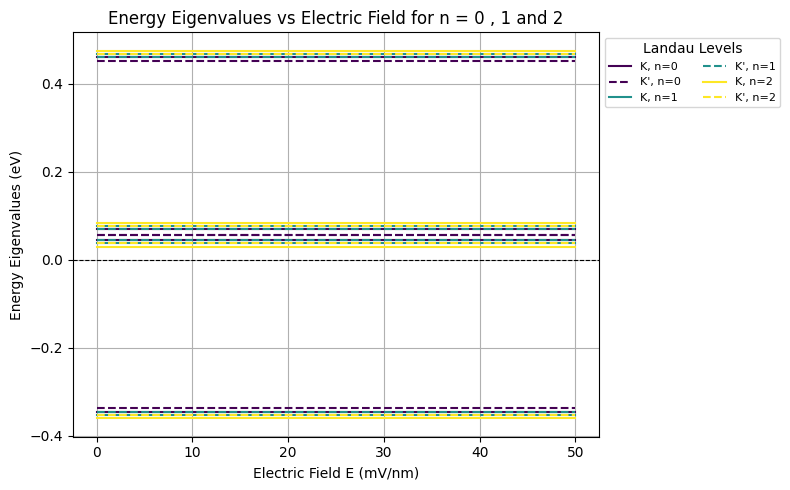

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(E_values, all_eigenvalues_ZS_EF_K_var_E[i, :, mode], color=colors[i], linestyle='-', label=f'K, n={n}' if mode == 0 else "")
        ax.plot(E_values, all_eigenvalues_ZS_EF_K_prime_var_E[i, :, mode], color=colors[i], linestyle='--', label=f"K', n={n}" if mode == 0 else "")

ax.set_xlabel('Electric Field E (mV/nm)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Electric Field for n = 0 , 1 and 2')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()

plt.tight_layout()

# Save the figure
# plt.savefig("energy_vs_B.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()